In [62]:
import math
import matplotlib.pyplot as plt
import random as rnd
import numpy as np

from scipy.optimize import curve_fit
import warnings
warnings.filterwarnings('ignore')

In [72]:
class Agent:
    def __init__(self):
        self.pos = 6
        
    def diffuse(self,mean):
        new_move = rnd.randint(-1,1) 
        if rnd.random()<((abs(self.pos-mean)/5)/mean):
            if self.pos-mean<0:
                new_move = rnd.random()
            else:
                new_move = -rnd.random()
        self.pos+=new_move

In [73]:
def test_agent():
    test_agent = Agent()
    for _ in range(10):
        test_agent.diffuse()
        print(test_agent.pos)

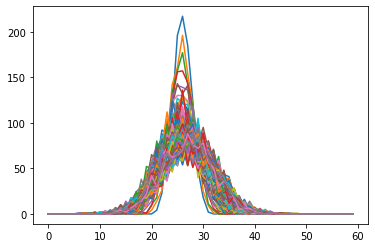

In [74]:
population =[Agent() for _ in range(1000)]
mean = 6
for i in range(5000):
    count=0
    for agent in population:
        count+=agent.pos
        agent.diffuse(mean)
    if i>2 and i % 2 ==0:
        bins=[0]*60
        for a in population:
            bins[math.floor((a.pos+20))]+=1
        plt.plot(bins)
    mean = count/len(population)
plt.show()
        

In [75]:
len(bins)

60

60 60
RMSE: 3.698659378123011
R-squared: 0.9793523058487564


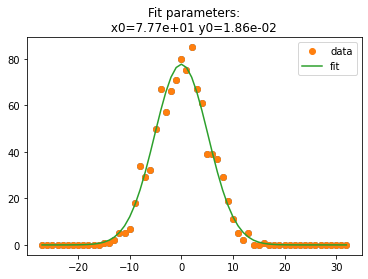

In [76]:
xdata = [i for i in range(-27,33)]
ydata = bins
print(len(xdata),len(ydata))
  
# Recast xdata and ydata into numpy arrays so we can use their handy features
xdata = np.asarray(xdata)
ydata = np.asarray(ydata)
plt.plot(xdata, ydata, 'o')
  
# Define the Gaussian function
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

p0 = [1., 1., 1.]
fit, covariance = curve_fit(Gauss, xdata,ydata)
  
fit_A = fit[0]
fit_B = fit[1]
  
fit_y = Gauss(xdata, fit_A, fit_B)
plt.title('Fit parameters:\n x0=%.2e y0=%.2e ' % (fit[0], fit[1]))

plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()



absError = fit_y - ydata

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(ydata))


print('RMSE:', RMSE)
print('R-squared:', Rsquared)

In [77]:
from scipy import stats
k2, p = stats.normaltest([a.pos for a in population])

In [78]:
p

0.15390344699032482